<a href="https://www.kaggle.com/code/adityaramachandran27/layoffs-complete-eda?scriptVersionId=131406684" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/layoffs-data-2022/layoffs_data.csv


<br>
<h1 style="font-size: 36px; font-family: 'Roboto Mono', monospace; font-weight: normal; background-color: #e9f7ef; color: #8f52a4; text-align: center; border-radius: 150px 150px;"><b>Summary of the Dataset<b></h1>
<br>


The dataset provides information on layoffs in different companies. It includes the following columns:

- `Company:` The name of the company where the layoffs occurred.
- `Location_HQ:` The headquarters location of the company.
- `Industry:` The industry or sector to which the company belongs.
- `Laid_Off_Count:` The number of employees laid off by the company.
- `Percentage:` The percentage of the company's workforce that was laid off.
- `Date:` The date when the layoffs took place.
- `Funds_Raised:` Information about the amount of funds raised by the company.
- `Stage:` The stage of development or growth of the company.
- `Country:` The country where the company is located.


This dataset is specifically used for tracking and analyzing layoffs in various companies, providing insights into workforce reductions within different industries and geographical locations. 

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")

<!-- <br>
<h1 style="font-size: 36px; font-family: 'Roboto Mono', monospace; font-weight: normal; background-color: #e9f7ef; color: #8f52a4; text-align: center; border-radius: 150px 150px;"><b>💼 Layoffs Complete EDA 📉</b></h1>
<br>
 -->

In [3]:
df = pd.read_csv('/kaggle/input/layoffs-data-2022/layoffs_data.csv')
df.head()

,Company,Location_HQ,Industry,Laid_Off_Count,Percentage,Date,Source,Funds_Raised,Stage,Date_Added,Country,List_of_Employees_Laid_Off
0,Pie Insurance,Washington D.C.,Finance,63.0,0.14,2023-05-18,https://media.pieinsurance.com/press-releases/...,621.0,Series D,2023-05-18 19:51:36,United States,Unknown
1,Clearbit,SF Bay Area,Sales,NaN,NaN,2023-05-18,https://clearbit.com/blog/an-update-from-clear...,17.0,Series A,2023-05-18 16:31:56,United States,Unknown
2,dbt Labs,Philadelphia,Data,NaN,0.15,2023-05-18,https://www.getdbt.com/blog/dbt-labs-update-a-...,414.0,Series D,2023-05-18 21:47:31,United States,Unknown
3,L1ght,Tel Aviv,Other,NaN,1.00,2023-05-18,https://www.calcalistech.com/ctechnews/article...,15.0,Seed,2023-05-19 23:47:06,Israel,Unknown
4,Nextbite,Denver,Food,NaN,NaN,2023-05-18,https://www.restaurantdive.com/news/nextbite-l...,150.0,Series C,2023-05-20 23:07:52,United States,Unknown


In [4]:
df.columns

Index(['Company', 'Location_HQ', 'Industry', 'Laid_Off_Count', 'Percentage',
       'Date', 'Source', 'Funds_Raised', 'Stage', 'Date_Added', 'Country',
       'List_of_Employees_Laid_Off'],
      dtype='object')

In [5]:
df = df[['Company', 'Location_HQ', 'Industry', 'Laid_Off_Count', 'Percentage',
       'Date','Funds_Raised', 'Stage','Country']]

In [6]:
df.head()

,Company,Location_HQ,Industry,Laid_Off_Count,Percentage,Date,Funds_Raised,Stage,Country
0,Pie Insurance,Washington D.C.,Finance,63.0,0.14,2023-05-18,621.0,Series D,United States
1,Clearbit,SF Bay Area,Sales,NaN,NaN,2023-05-18,17.0,Series A,United States
2,dbt Labs,Philadelphia,Data,NaN,0.15,2023-05-18,414.0,Series D,United States
3,L1ght,Tel Aviv,Other,NaN,1.00,2023-05-18,15.0,Seed,Israel
4,Nextbite,Denver,Food,NaN,NaN,2023-05-18,150.0,Series C,United States


# <span><h1 style="font-size: 36px; font-family: 'Roboto Mono', monospace; font-weight: normal; background-color: #e9f7ef; color: #8f52a4; text-align: center; border-radius: 150px 150px;"><b>Preliminary Analysis of the Dataset</b></h1></span>
<br>

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2621 entries, 0 to 2620
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Company         2621 non-null   object 
 1   Location_HQ     2621 non-null   object 
 2   Industry        2621 non-null   object 
 3   Laid_Off_Count  1798 non-null   float64
 4   Percentage      1751 non-null   float64
 5   Date            2619 non-null   object 
 6   Funds_Raised    2366 non-null   float64
 7   Stage           2621 non-null   object 
 8   Country         2621 non-null   object 
dtypes: float64(3), object(6)
memory usage: 184.4+ KB


In [8]:
df.describe()

,Laid_Off_Count,Percentage,Funds_Raised
count,1798.000000,1751.000000,2366.000000
mean,255.808676,0.261838,800.831486
std,834.049411,0.260340,5369.214729
min,3.000000,0.000000,0.000000
25%,38.250000,0.100000,50.000000
50%,80.000000,0.170000,155.000000
75%,180.000000,0.300000,441.750000
max,12000.000000,1.000000,121900.000000


In [9]:
df.duplicated().sum()

1

In [10]:
# Finding which row is duplicated

df[df.duplicated()]

,Company,Location_HQ,Industry,Laid_Off_Count,Percentage,Date,Funds_Raised,Stage,Country
1754,Cazoo,London,Transportation,750.0,0.15,2022-06-07,2000.0,Post-IPO,United Kingdom


In [11]:
# Dropping the duplicate values

df.drop_duplicates(inplace=True)

In [12]:
df.duplicated().sum()

0

In [13]:
# Finding missing values by column
df.isnull().sum()

Company             0
Location_HQ         0
Industry            0
Laid_Off_Count    823
Percentage        870
Date                2
Funds_Raised      255
Stage               0
Country             0
dtype: int64

In [14]:
# percent of missing vals by column

(df.isnull().sum() / len(df))*100

Company            0.000000
Location_HQ        0.000000
Industry           0.000000
Laid_Off_Count    31.412214
Percentage        33.206107
Date               0.076336
Funds_Raised       9.732824
Stage              0.000000
Country            0.000000
dtype: float64

In [15]:
# Replacing NaN values with 0

df['Laid_Off_Count'] = df['Laid_Off_Count'].replace(np.NaN, 0)
df['Percentage'] = df['Percentage'].replace(np.NaN, 0)
df['Funds_Raised'] = df['Funds_Raised'].replace(np.NaN, 0)
df.dropna(inplace=True)

df.isnull().sum()

Company           0
Location_HQ       0
Industry          0
Laid_Off_Count    0
Percentage        0
Date              0
Funds_Raised      0
Stage             0
Country           0
dtype: int64

In [16]:
import datetime as dt

In [17]:
# Converting date column to date time and making Year and Month column from it 

df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month_name()
df['Quarter'] = df['Date'].dt.to_period('Q')


In [18]:
df.head()

,Company,Location_HQ,Industry,Laid_Off_Count,Percentage,Date,Funds_Raised,Stage,Country,Year,Month,Quarter
0,Pie Insurance,Washington D.C.,Finance,63.0,0.14,2023-05-18,621.0,Series D,United States,2023,May,2023Q2
1,Clearbit,SF Bay Area,Sales,0.0,0.00,2023-05-18,17.0,Series A,United States,2023,May,2023Q2
2,dbt Labs,Philadelphia,Data,0.0,0.15,2023-05-18,414.0,Series D,United States,2023,May,2023Q2
3,L1ght,Tel Aviv,Other,0.0,1.00,2023-05-18,15.0,Seed,Israel,2023,May,2023Q2
4,Nextbite,Denver,Food,0.0,0.00,2023-05-18,150.0,Series C,United States,2023,May,2023Q2


# <span><h1 style="font-size: 36px; font-family: 'Roboto Mono', monospace; font-weight: normal; background-color: #e9f7ef; color: #8f52a4; text-align: center; border-radius: 150px 150px;"><b>Exploratory Data Analysis</b></h1></span>
<br>

# <span><h1 style="font-size: 24px; font-family: 'Roboto Mono', monospace; font-weight: normal; background-color: #13293D; color:#F6F6F6; text-align: center; border-radius: 150px 150px;"><b>Segregating columns based on types</b></h1></span>
<br>

    
- **Numerical** - Laid_Off_Count, Percentage, Funds_Raised
- **Categorical** - Industry, Stage, Month, Quarter 

# <span><h1 style="font-size: 24px; font-family: 'Roboto Mono', monospace; font-weight: normal; background-color: #13293D; color:#F6F6F6; text-align: center; border-radius: 150px 150px;"><b>Analysis on Industry</b></h1></span>
<br

In [19]:
df['Industry'].unique()

array(['Finance', 'Sales', 'Data', 'Other', 'Food', 'Transportation',
       'Healthcare', 'Logistics', 'Retail', 'Legal', 'Crypto',
       'Recruiting', 'Security', 'Media', 'Education', 'Travel',
       'Marketing', 'Real Estate', 'Consumer', 'HR', 'Infrastructure',
       'Construction', 'Hardware', 'Manufacturing', 'Fitness', 'Support',
       'Unknown', 'Product', 'Energy', 'Aerospace'], dtype=object)

In [20]:
# df.groupby('Industry')['Percentage'].sum().sort_values(ascending=False).reset_index()

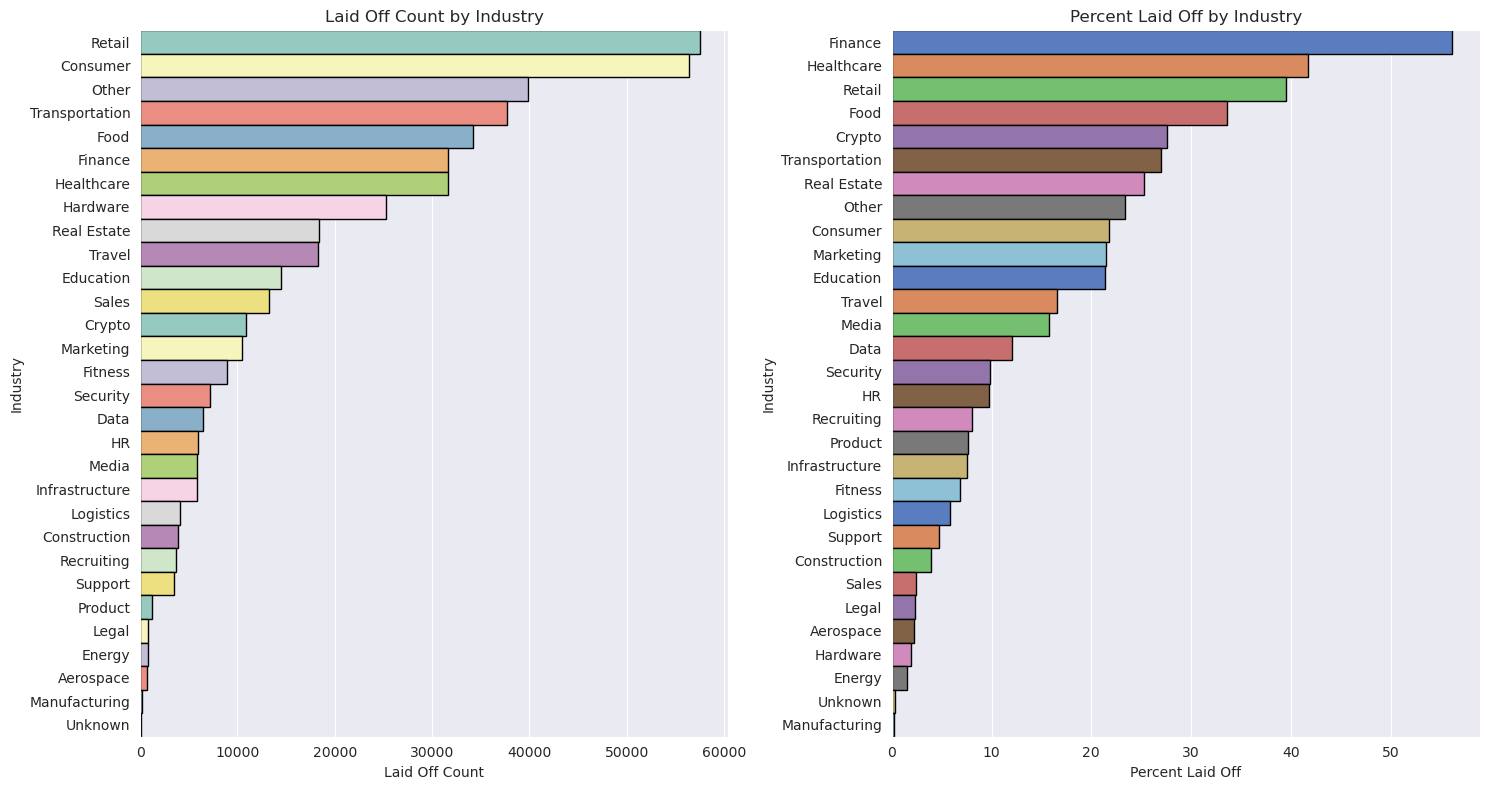

In [21]:
fig, ax = plt.subplots(1, 2,figsize=(15,8))

ax[0] = sns.barplot(data=df.groupby('Industry')['Laid_Off_Count'].sum().sort_values(ascending=False).reset_index(), 
            y='Industry', x='Laid_Off_Count', errorbar=None, width=1, edgecolor='black', palette='Set3', ax=ax[0])
ax[0].set(title='Laid Off Count by Industry', xlabel='Laid Off Count')

ax[1] = sns.barplot(data=df.groupby('Industry')['Percentage'].sum().sort_values(ascending=False).reset_index(), 
            y='Industry', x='Percentage', errorbar=None, width=1, edgecolor='black', palette='muted', ax=ax[1])
ax[1].set(title='Percent Laid Off by Industry', xlabel='Percent Laid Off')


plt.tight_layout()

fig.show()

# <span><h1 style="font-size: 24px; font-family: 'Roboto Mono', monospace; font-weight: normal; background-color: #13293D; color:#F6F6F6; text-align: center; border-radius: 150px 150px;"><b>Analysis on Stage</b></h1></span>
<br>

In [22]:
df['Stage'].unique()

array(['Series D', 'Series A', 'Seed', 'Series C', 'Post-IPO', 'Unknown',
       'Private Equity', 'Acquired', 'Series E', 'Series F', 'Series B',
       'Series G', 'Series H', 'Subsidiary', 'Series J', 'Series I'],
      dtype=object)

In [23]:
df['Stage']

0       Series D
1       Series A
2       Series D
3           Seed
4       Series C
          ...   
2614        Seed
2615     Unknown
2616        Seed
2617    Series C
2618    Series A
Name: Stage, Length: 2618, dtype: object

In [24]:
# df.groupby('Stage')['Laid_Off_Count'].sum().sort_values(ascending=False).reset_index()

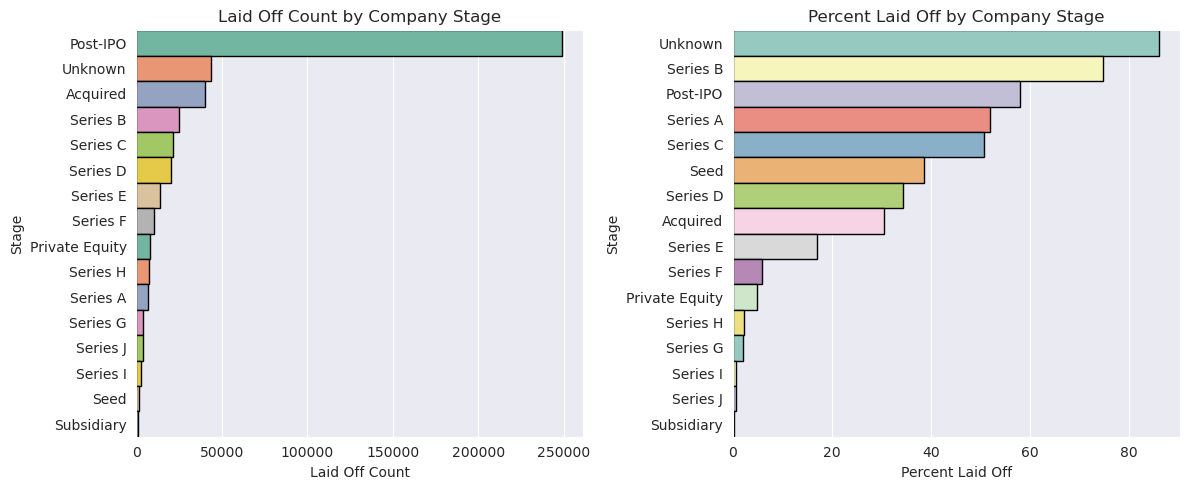

In [25]:
fig, ax = plt.subplots(1, 2,figsize=(12,5))

ax[0] = sns.barplot(data=df.groupby('Stage')['Laid_Off_Count'].sum().sort_values(ascending=False).reset_index(), 
            y='Stage', x='Laid_Off_Count', errorbar=None, width=1, edgecolor='black', palette='Set2', ax=ax[0])
ax[0].set(title='Laid Off Count by Company Stage', xlabel='Laid Off Count')

ax[1] = sns.barplot(data=df.groupby('Stage')['Percentage'].sum().sort_values(ascending=False).reset_index(), 
            y='Stage', x='Percentage', errorbar=None, width=1, edgecolor='black', palette='Set3', ax=ax[1])
ax[1].set(title='Percent Laid Off by Company Stage', xlabel='Percent Laid Off')


plt.tight_layout()

fig.show()

<br>
<h3 style="font-size: 20px; font-family: 'Roboto Mono', monospace; font-weight: normal; color:#420516C; text-align: left;">Conclusions</h3>

- The most number of employees were laid off by Post-IPO firms 
- The most percentage of employees were laid off by Series-B firms
- A lot of people work at Post IPO firms as compare 

# <span><h1 style="font-size: 24px; font-family: 'Roboto Mono', monospace; font-weight: normal; background-color: #13293D; color:#F6F6F6; text-align: center; border-radius: 150px 150px;"><b>Analysis on Year</b></h1></span>
<br>

In [26]:
df['Year'].unique()

array([2023, 2022, 2021, 2020])

In [27]:
df.groupby('Year')['Laid_Off_Count'].sum()

Year
2020     80998.0
2021     15823.0
2022    163841.0
2023    197985.0
Name: Laid_Off_Count, dtype: float64

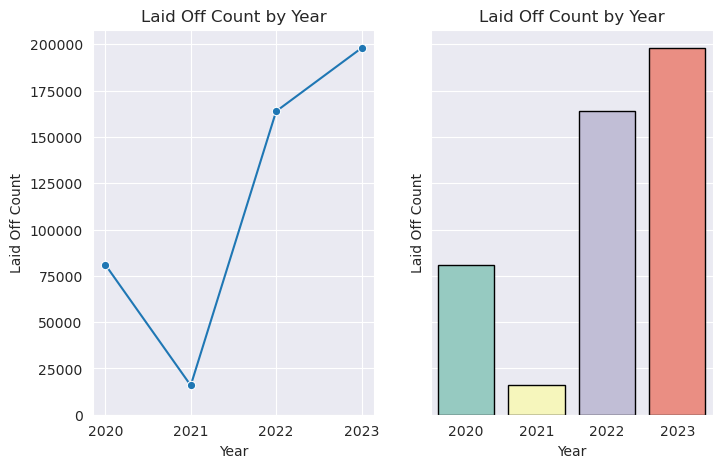

In [28]:
fig, ax = plt.subplots(1,2, sharey=True, figsize=(8,5))
ax[0] = sns.lineplot(data=df.groupby('Year')['Laid_Off_Count'].sum().reset_index(), x='Year', y='Laid_Off_Count', 
                  errorbar=None, marker='o', ax=ax[0])
ax[0].set(title='Laid Off Count by Year', ylabel='Laid Off Count')


ax[1] = sns.barplot(data=df.groupby('Year')['Laid_Off_Count'].sum().reset_index(), x='Year', y='Laid_Off_Count', 
                  errorbar=None, ax=ax[1], palette='Set3', linewidth=1,edgecolor='black')
ax[1].set(title='Laid Off Count by Year', ylabel='Laid Off Count')


fig.show()


<br>
<h3 style="font-size: 20px; font-family: 'Roboto Mono', monospace; font-weight: normal; color:#420516C; text-align: left;">Conclusions</h3>

- 2023 has been the worst year for employees 
- The layoffs decreased a lot in 2021,we will have to check it

# <span><h1 style="font-size: 24px; font-family: 'Roboto Mono', monospace; font-weight: normal; background-color: #13293D; color:#F6F6F6; text-align: center; border-radius: 150px 150px;"><b>Analysis on Month</b></h1></span>
<br>

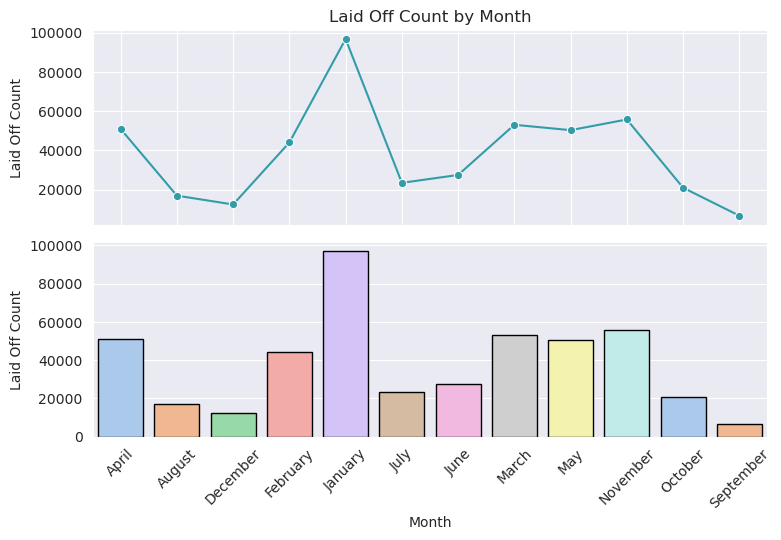

In [29]:

fig, ax = plt.subplots(2,1, sharex=True, figsize=(8,5))
ax[0] = sns.lineplot(data=df.groupby('Month')['Laid_Off_Count'].sum().reset_index(), x='Month', y='Laid_Off_Count', 
                  errorbar=None, marker='o', ax=ax[0], color='#329da8')
ax[0].set(title='Laid Off Count by Month', ylabel='Laid Off Count')

ax[1] = sns.barplot(data=df.groupby('Month')['Laid_Off_Count'].sum().reset_index(), x='Month', y='Laid_Off_Count', 
                  errorbar=None, ax=ax[1], palette='pastel', linewidth=1,edgecolor='black')
ax[1].set(ylabel='Laid Off Count')

plt.tight_layout()
plt.xticks(rotation=45)

fig.show()

<br>
<h3 style="font-size: 20px; font-family: 'Roboto Mono', monospace; font-weight: normal; color:#420516C; text-align: left;">Conclusions</h3>

- Most layoffs happen in the month of Jan
- On a quick Google search, this is what I found:
    > Layoffs can occur at any time. But as far as when layoffs most often occur, January and December are months well-known for job losses. Employers are reviewing their budgets during that time of year.

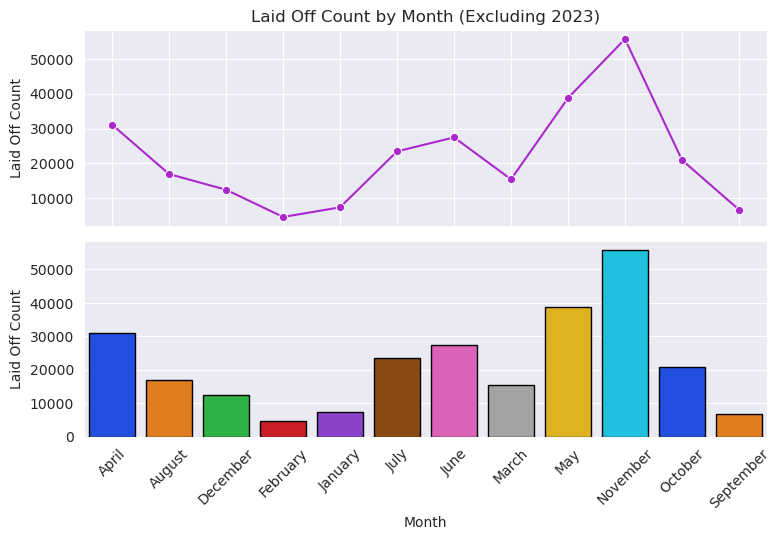

In [30]:
fig, ax = plt.subplots(2,1, sharex=True, figsize=(8,5))
ax[0] = sns.lineplot(data=df.query("Year != 2023").groupby('Month')['Laid_Off_Count'].sum().reset_index(), x='Month', y='Laid_Off_Count', 
                  errorbar=None, marker='o', ax=ax[0], color='#ab29cc')
ax[0].set(title='Laid Off Count by Month (Excluding 2023)', ylabel='Laid Off Count')

ax[1] = sns.barplot(data=df.query("Year != 2023").groupby('Month')['Laid_Off_Count'].sum().reset_index(), x='Month', y='Laid_Off_Count', 
                  errorbar=None, ax=ax[1], palette='bright' , linewidth=1,edgecolor='black')
ax[1].set(ylabel='Laid Off Count')

plt.tight_layout()
plt.xticks(rotation=45)

fig.show()

**If we ignore 2023, due to mass recession and the companies firing a lot of employees in Jan, we see that generally layoffs happen in the month of November.**

# <span><h1 style="font-size: 24px; font-family: 'Roboto Mono', monospace; font-weight: normal; background-color: #13293D; color:#F6F6F6; text-align: center; border-radius: 150px 150px;"><b>Analysis on Quarter</b></h1></span>
<br>

In [31]:
df['Quarter'].unique()

<PeriodArray>
['2023Q2', '2023Q1', '2022Q4', '2022Q3', '2022Q2', '2022Q1', '2021Q4',
 '2021Q3', '2021Q2', '2021Q1', '2020Q4', '2020Q3', '2020Q2', '2020Q1']
Length: 14, dtype: period[Q-DEC]

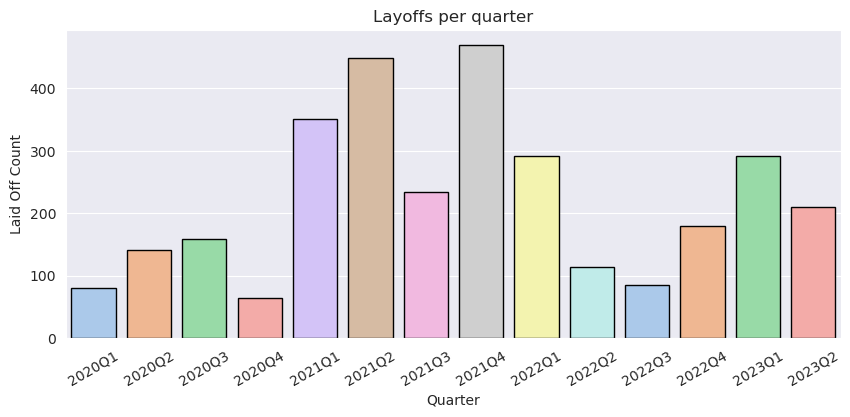

In [32]:
fig, ax = plt.subplots(figsize=(10,4))
ax = sns.barplot(data=df.sort_values(by='Quarter'), x='Quarter', y='Laid_Off_Count'
                 ,linewidth=1,edgecolor='black', errorbar=None, palette='pastel')
ax.set(title='Layoffs per quarter', ylabel='Laid Off Count')
plt.xticks(rotation=30)
plt.show()

# <span><h1 style="font-size: 24px; font-family: 'Roboto Mono', monospace; font-weight: normal; background-color: #13293D; color:#F6F6F6; text-align: center; border-radius: 150px 150px;"><b>Analysis on Country</b></h1></span>
<br>

In [33]:
df['Country'].unique()

array(['United States', 'Israel', 'United Kingdom', 'Brazil', 'Romania',
       'India', 'Chile', 'Australia', 'Canada', 'Indonesia', 'France',
       'Singapore', 'Germany', 'Saudi Arabia', 'Poland', 'Philippines',
       'Nigeria', 'New Zealand', 'Spain', 'China', 'Sweden', 'Mexico',
       'Austria', 'Ukraine', 'Switzerland', 'Ireland', 'Japan',
       'South Korea', 'Italy', 'Estonia', 'Finland', 'Netherlands',
       'Portugal', 'Colombia', 'Argentina', 'Seychelles', 'Egypt',
       'Kenya', 'Luxembourg', 'Greece', 'Norway', 'Belgium', 'Denmark',
       'Hong Kong', 'Malaysia', 'Hungary', 'Vietnam', 'Thailand',
       'Lithuania', 'Ghana', 'Senegal', 'Pakistan',
       'United Arab Emirates', 'Peru', 'Bahrain', 'Turkey', 'Russia',
       'Uruguay', 'Bulgaria', 'South Africa', 'Czech Republic', 'Myanmar'],
      dtype=object)

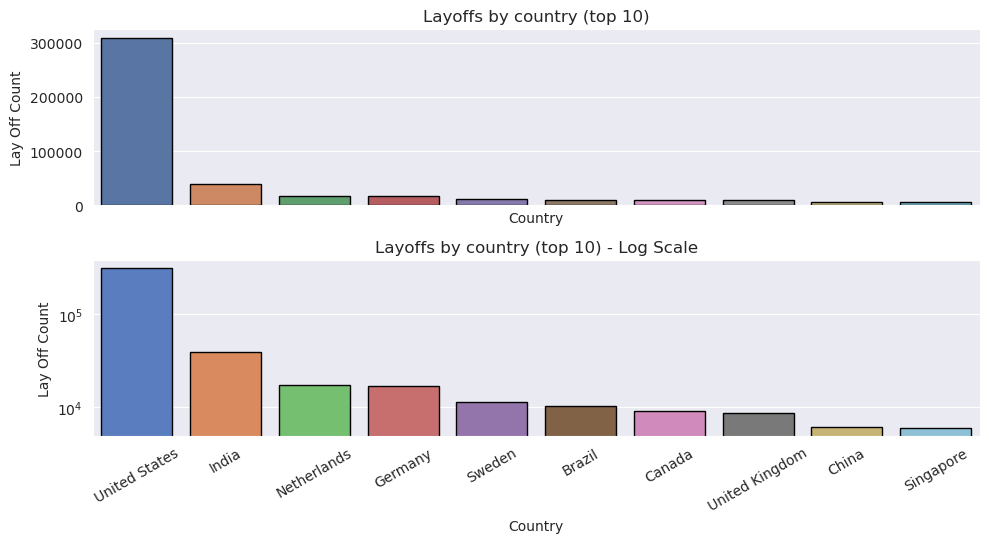

In [34]:
fig, ax = plt.subplots(2,1,figsize=(10,5), sharex=True)
ax[0] = sns.barplot(data=df.groupby('Country')['Laid_Off_Count'].sum().sort_values(ascending=False).reset_index().head(10),
             x='Country', y='Laid_Off_Count', linewidth=1,edgecolor='black', errorbar=None, palette='deep', ax=ax[0])
ax[0].set(title='Layoffs by country (top 10)', ylabel='Lay Off Count')

ax[1] = sns.barplot(data=df.groupby('Country')['Laid_Off_Count'].sum().sort_values(ascending=False).reset_index().head(10),
             x='Country', y='Laid_Off_Count', linewidth=1,edgecolor='black', errorbar=None, palette='muted', ax=ax[1])
ax[1].set(title='Layoffs by country (top 10) - Log Scale', ylabel='Lay Off Count')
ax[1].set_yscale('log')

plt.tight_layout()
plt.xticks(rotation=30)
plt.show()

<br>
<h3 style="font-size: 20px; font-family: 'Roboto Mono', monospace; font-weight: normal; color:#420516C; text-align: left;">Conclusions</h3>

- The situation in the United States is extremely concerning, as indicated by the bar chart where the data for the US far exceeds that of other countries, making a noticeable impact in the comparison.

# <span><h1 style="font-size: 24px; font-family: 'Roboto Mono', monospace; font-weight: normal; background-color: #13293D; color:#F6F6F6; text-align: center; border-radius: 150px 150px;"><b>Analysis on company</b></h1></span>
<br>

In [35]:
df['Company'].nunique()

2063

In [36]:
# top_10 = df.groupby('Company')['Laid_Off_Count'].sum().sort_values(ascending=False).reset_index().head(10)['Company'].values
# df[df['Company'].isin(top_10)].groupby('Company')['Percentage'].sum().sort_values(ascending=False).reset_index()

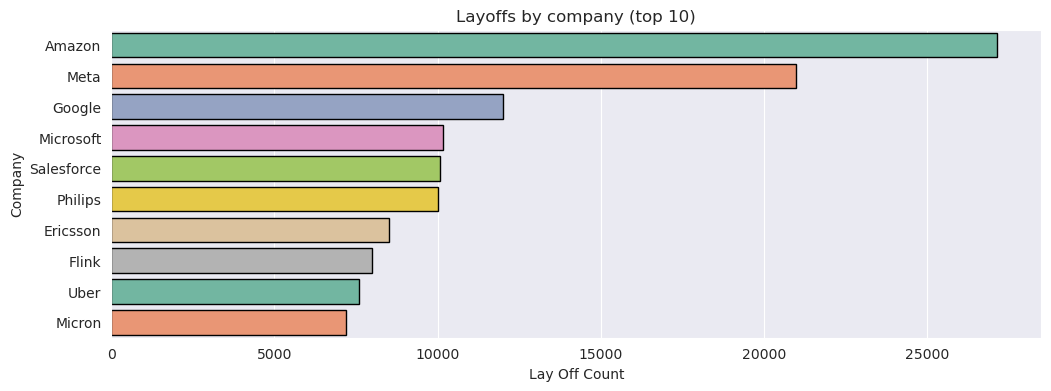

In [37]:
fig, ax = plt.subplots(figsize=(12,4))

ax = sns.barplot(data= df.groupby('Company')['Laid_Off_Count'].sum().sort_values(ascending=False).reset_index().head(10), 
                 x='Laid_Off_Count', y='Company'
                ,linewidth=1,edgecolor='black', errorbar=None, palette='Set2', ax=ax)
ax.set(title='Layoffs by company (top 10)', xlabel='Lay Off Count')

plt.show()

# <span><h1 style="font-size: 24px; font-family: 'Roboto Mono', monospace; font-weight: normal; background-color: #13293D; color:#F6F6F6; text-align: center; border-radius: 150px 150px;"><b>Analysis on HQ</b></h1></span>
<br>

In [38]:
df['Location_HQ'].nunique()

208

In [39]:
top_10 = df.groupby('Location_HQ')['Laid_Off_Count'].sum().sort_values(ascending=False).reset_index().head(10)
top_10

,Location_HQ,Laid_Off_Count
0,SF Bay Area,147439.0
1,Seattle,44899.0
2,New York City,30240.0
3,Bengaluru,23267.0
4,Amsterdam,17140.0
5,Berlin,12903.0
6,Boston,11776.0
7,Stockholm,11232.0
8,Austin,11199.0
9,Sao Paulo,9081.0


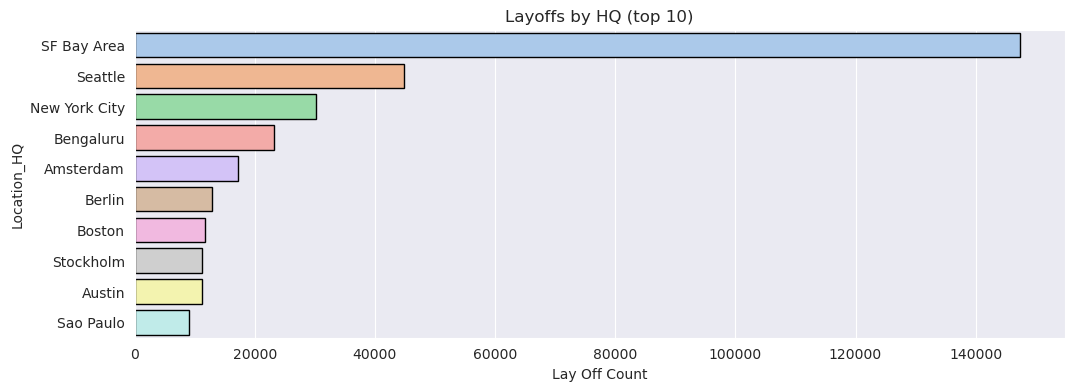

In [40]:
fig, ax = plt.subplots(figsize=(12,4))

ax = sns.barplot(data= df.groupby('Location_HQ')['Laid_Off_Count'].sum().sort_values(ascending=False).reset_index().head(10), 
                 x='Laid_Off_Count', y='Location_HQ'
                ,linewidth=1,edgecolor='black', errorbar=None, palette='pastel', ax=ax)
ax.set(title='Layoffs by HQ (top 10)', xlabel='Lay Off Count')

plt.show()

# <span><h1 style="font-size: 24px; font-family: 'Roboto Mono', monospace; font-weight: normal; background-color: #13293D; color:#F6F6F6; text-align: center; border-radius: 150px 150px;"><b>Analysis on Year & Month</b></h1></span>
<br>

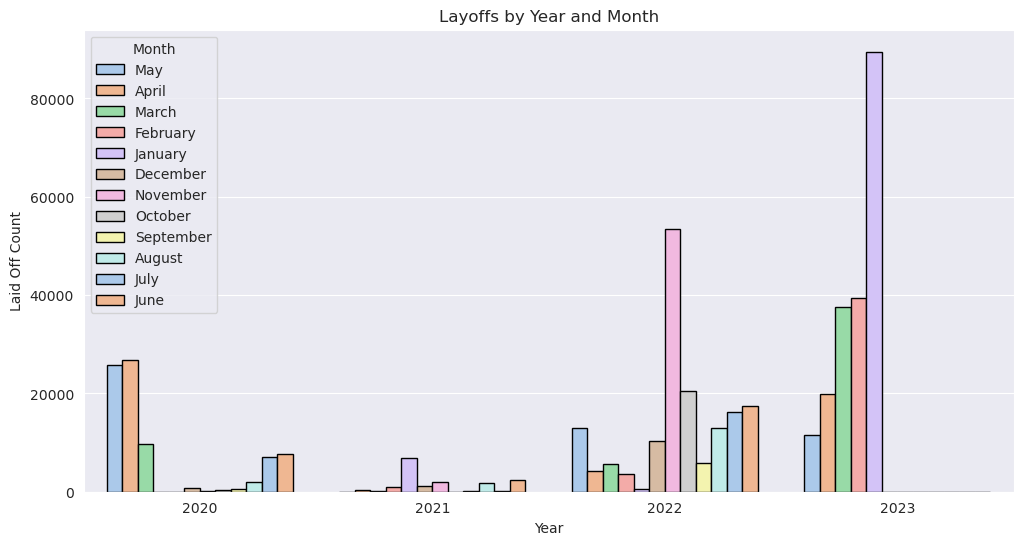

In [41]:
fig, ax = plt.subplots(figsize=(12,6))
ax = sns.barplot(data=df, x='Year', y='Laid_Off_Count', hue='Month',estimator=sum, edgecolor='black', errorbar=None, ax = ax, palette='pastel')
ax.set(title='Layoffs by Year and Month', ylabel='Laid Off Count')
plt.show()

<div align='center'>
    <h2> End of EDA </h2>
</div>
            

- Thank you for joining me on this exploratory data analysis (EDA) journey. We have delved into the dataset, analyzed various aspects, and gained insights into the information it holds. 
- If you have any comments, suggestions, or additional insights related to the analysis I have conducted, I encourage you to share them in the comments section. 